<a href="https://colab.research.google.com/github/FGalvao77/Introducao-ao-AutoML-com-PyCaret/blob/main/Introdu%C3%A7%C3%A3o_ao_AutoML_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução ao AutoML com PyCaret**

---



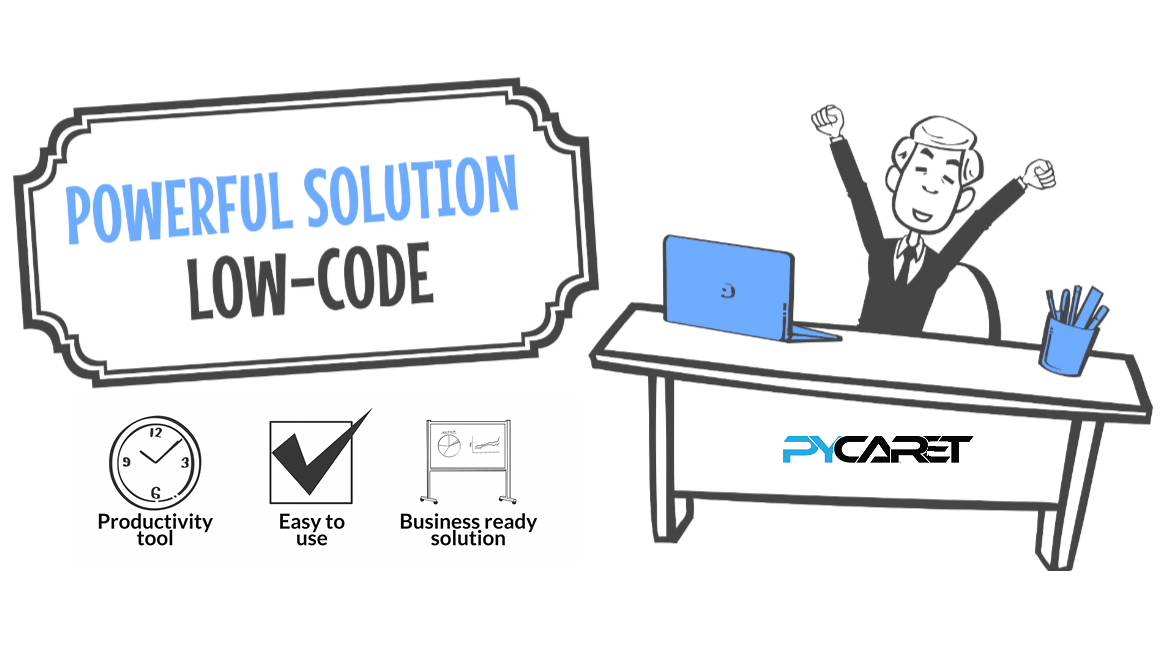

**Official Page:** https://pycaret.org/

## **1. Introdução**

**O que é o `PyCaret`?**

_`PyCaret` é uma biblioteca de aprendizado de máquina de código aberto e baixo código (**low-code**) em Python que permite ir desde a preparação de seus dados até a implantação de seu modelo em minutos, na escolha do ambiente de notebook._

Essa definição se encontra no próprio site da biblioteca - é uma tradução bem literal, vou tentar deixar mais claro a definição.

O principal propósito da biblioteca é otimizar as necessidades do profissional e trazer mais "produtividade" e entrega de análises/projetos de ciência de dados, aprendizado de máquinas e etc.

A biblioteca _"encapsula"_ ou melhor possui um `pipeline` de vários modelos e roda-os simultaneamente e por fim, **ranqueia** os modelos conforme um parâmetro definido de avaliação ou não pelo usuário.

Melhor forma para aprender é **"botar a mão na massa!"**

Então vamos lá!!!!



## **2. Instalando a biblioteca**

In [ ]:
# primeiro vamos ver se os diretórios/dependências necessita de atualizações
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.0 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/ub

In [ ]:
# comando para instalar a biblioteca "pycaret"
!pip install pycaret

In [ ]:
# atualizando os diretórios/dependências
!apt upgrade

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Calculating upgrade... Done
The following packages have been kept back:
  libcudnn8 libcudnn8-dev libnccl-dev libnccl2
The following packages will be upgraded:
  base-files binutils binutils-common binutils-x86-64-linux-gnu gnupg2 gzip
  icu-devtools libaudit-common libaudit1 libbinutils libc-bin libcublas-dev
  libcublas10 libcudnn7 libcudnn7-dev libgnutls30 libhogweed4 libicu-dev
  libicu60 libiculx60 libldap-2.4-2 libldap-common liblz4-1 libnettle6
  libp11-kit0 libpam-modules libpam-modules-bin libpam-runtime libpam0g
  librados2 librbd1 libsasl2-2 libsasl2-modules-db libseccomp2 libzstd1
  linux-libc-dev openssl r-base r-base-core r-base-dev r-recommended tar
  ubuntu-keyring
43 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Need to get 494 MB of archives.
After this operation, 69.7 MB of additional disk space will be used.
Get:1 https://developer.download.nvidia.com/compu

In [ ]:
# removendo aplicações obsoletas
!apt autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


## **3. Carregando o conjunto de dados**

Para nossa atividade prática, usaremos uma função própria da biblioteca que nos fornece uma gama de `datasets`.

Segue o comando abaixo.

```python
# importando a função para carregamento de datasets
from pycaret.datasets import get_data
```

In [ ]:
# importando a biblioteca para importação de datasets
from pycaret.datasets import get_data

Através do comando que segue.
```python 
get_data('index')
```
Podemos visualizar os conjuntos de dados fornecidos pelo `PyCaret`.

In [ ]:
# visualizando os datasets embutidos no pycaret
get_data('index');

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


> Podemos ver que a biblioteca possui um número bem considerado de `datasets` e para as mais diversas aplicações/estudos.

> Iremos trabalhar com três cases:     
- um de _regressão_.
    - o dataset `"house"`.
- e outro de _classificação_.
    - o dataset chamado `"employee"`.
- e por fim um de _clusterização_.
    - o dataset `"seeds"`.



O dataset `house ` contém observações sobre casas e, o objetivo é prever o valor de venda da casa.

Já o dataset  `employee` contém observações de funcionários de uma empresa e, o objetivo é prever, dado algumas variáveis se o funcionário irá deixar ou não a empresa.

E por fim o dataset `seeds` contém observações sobre grão de trigo, onde iremos agrupar os mesmos por similaridade, utilizando técnica de aprendizado não-supervisionado.

## **4. Regressão - `house`**

#### **4.1. Importando e preparando os dados**

In [ ]:
# importando a função "get_data" do módulo ".datasets" da biblioteca "pycaret"
from pycaret.datasets import get_data

In [ ]:
# instanciando o dataset "house" no objeto de mesmo nome
house = get_data('house')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# dimensão do dataset
house.shape    # linhas e colunas

(1460, 81)

> Veja que esse conjunto de dados possui um número alto de recursos (colunas).

In [ ]:
# data = house.sample(frac=0.7, random_state=786)
# data_unseen = house.drop(data.index)

# data.reset_index(drop=True, inplace=True)
# data_unseen.reset_index(drop=True, inplace=True)

# print('Data for Modeling: ' + str(data.shape))
# print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Diferentemente do tutorial do próprio `PyCaret`, aqui estarei adotando outra estratégia na divisão dos dados.

Importarei a função `train_test_split` do módulo `model_selection` do **sklearn** para realizar o particionamento do dataset.


In [ ]:
# importando a função 
from sklearn.model_selection import train_test_split

In [ ]:
# instanciando o conjunto de dados nas variáveis X e y
X = house
y = house

In [ ]:
# realizando o reset dos índices
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [ ]:
# visualizando a dimensão das variáveis
X.shape, y.shape

((1460, 81), (1460, 81))

In [ ]:
# aplicando a divisão dos dados em treino e teste - reservarei 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

> Dividi as váriavies `X` e `y` em partes para treino e outra parte para teste.

In [ ]:
# visualizando o tamanho das partições 
len(X_train), len(X_test), len(y_train), len(y_test)

(1022, 438, 1022, 438)

#### **4.2. Aplicando a regressão**

In [ ]:
# importando o módulo de regressão
from pycaret.regression import*

In [ ]:
# visualizando a variável "X_train"
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
376,377,85,RL,57.0,8846,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,SFoyer,5,5,1996,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,298,Unf,0,572,870,GasA,Ex,Y,SBrkr,914,0,0,914,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1998.0,Unf,2,576,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,148000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,Po,CBlock,TA,TA,No,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,1306,0,0,1306,0,0,1,0,3,1,Fa,6,Mod,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,263,0,0,0,0,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
228,229,20,RL,70.0,8521,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,842,Unf,0,70,912,GasA,TA,Y,SBrkr,912,0,0,912,0,0,1,0,3,1,TA,5,Typ,1,Fa,Detchd,1974.0,Unf,1,336,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,125000
40,41,20,RL,84.0,8658,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1965,1965,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,101.0,TA,TA,CBlock,TA,TA,No,Rec,643,Unf,0,445,1088,GasA,Ex,Y,SBrkr,1324,0,0,1324,0,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1965.0,RFn,2,440,TA,TA,Y,0,138,0,0,0,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,160000
428,429,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,108.0,Gd,TA,PConc,Gd,TA,No,GLQ,664,Unf,0,544,1208,GasA,Ex,Y,SBrkr,1208,0,0,1208,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2007.0,RFn,2,628,TA,TA,Y,105,54,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial,195400


In [ ]:
# visualizando a variável "X_test"
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
147,148,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,180.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,884,884,GasA,Ex,Y,SBrkr,884,1151,0,2035,0,0,2,1,3,1,Gd,8,Typ,1,Gd,BuiltIn,2001.0,Fin,2,434,TA,TA,Y,144,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,2,1900,1950,Gable,CompShg,AsbShng,Stucco,None,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0,Unf,0,1095,1095,GasW,Fa,N,SBrkr,1095,679,0,1774,1,0,2,0,4,2,TA,8,Min2,0,NaN,2Types,1920.0,Unf,3,779,Fa,Fa,N,0,0,90,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000
1304,1305,160,RM,32.0,3363,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,117.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,976,976,GasA,Ex,Y,SBrkr,976,732,0,1708,0,0,2,0,3,1,Gd,7,Maj1,0,NaN,Detchd,2004.0,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,130000
1372,1373,60,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,975,Unf,0,133,1108,GasA,Ex,Y,SBrkr,1108,989,0,2097,1,0,2,1,3,1,Gd,8,Typ,1,TA,Detchd,1998.0,RFn,2,583,TA,TA,Y,253,170,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,274300
1427,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,5,6,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,580,Unf,0,333,913,GasA,TA,Y,FuseA,1048,510,0,1558,1,0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1962.0,Unf,1,288,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,140000


In [ ]:
# quantidade de colunas e o seu nome da variável "X_train"
len(X_train.columns), X_train.columns

(81, Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'Garage

In [ ]:
# quantidade de colunas e o seu nome da variável "X_test"
len(X_test.columns), X_test.columns

(81, Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'Garage

In [ ]:
# inicializando o pipeline de regressão
regressor = setup(X_train,                              # dados entrada, nesse caso o X_train
                  remove_outliers=True,                 # removendo a presença de outliers
                  normalize=True,                       # normalizando os dados
                  fold=5,                               # validação cruzada em 5 partes
                  target='SalePrice',                   # instanciando a variável alvo
                #   pca=True,                           # redução da dimensionalidade dos dados
                  feature_selection=True,               # aplicando selecão dos recursos
                  feature_selection_threshold=0.7,      # limite usado para seleção de recursos
                  ignore_low_variance=True,             # ignorando baixa variância
                  remove_multicollinearity=True,        # removendo multicolinearidade
                  multicollinearity_threshold=0.7,      # definindo um limite para descarte da multicolinearidade      
                  remove_perfect_collinearity=True,     # removendo colinearidade perfeita
                  silent=True)                          # controla a entrada de confirmação de tipos de dados 

,Description,Value
0,session_id,3815
1,Target,SalePrice
2,Original Data,"(1022, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(679, 229)"


> O código acima retorna a lista de parâmetros utilizados e definidos pelo usuário e os que foram instanciados por padrão.

Segue o link da documentação mais detalhada dos parâmetros utilizados e de outros.

- https://pycaret.readthedocs.io/en/latest/api/regression.html

In [ ]:
# visualizando o melhor modelo e classificando pela raiz do erro médio quadrático -  RMSE (root mean squared error)
best_model = compare_models(sort='RMSE', )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1.586977e+04,6.223943e+08,2.478076e+04,9.045000e-01,0.1349,9.500000e-02,0.150
br,Bayesian Ridge,1.739850e+04,6.652257e+08,2.568340e+04,8.967000e-01,0.1430,1.061000e-01,0.076
ridge,Ridge Regression,1.836133e+04,7.047321e+08,2.650593e+04,8.889000e-01,0.1523,1.113000e-01,0.022
omp,Orthogonal Matching Pursuit,1.897604e+04,7.483137e+08,2.725549e+04,8.838000e-01,0.1540,1.150000e-01,0.022
par,Passive Aggressive Regressor,1.769080e+04,7.627569e+08,2.729430e+04,8.851000e-01,0.1468,1.054000e-01,0.476
gbr,Gradient Boosting Regressor,1.827213e+04,7.855869e+08,2.786789e+04,8.739000e-01,0.1434,1.069000e-01,0.374
llar,Lasso Least Angle Regression,1.988165e+04,8.185710e+08,2.856671e+04,8.704000e-01,0.1728,1.211000e-01,0.104
lasso,Lasso Regression,2.041360e+04,8.563317e+08,2.921666e+04,8.644000e-01,0.1806,1.248000e-01,0.080
lightgbm,Light Gradient Boosting Machine,1.876129e+04,9.605855e+08,3.076993e+04,8.510000e-01,0.1511,1.097000e-01,0.110
rf,Random Forest Regressor,1.977000e+04,9.949586e+08,3.138764e+04,8.456000e-01,0.1563,1.156000e-01,1.332


> Veja que o modelo `Huber Regressor` foi o que obteve o primeiro lugar.

Portanto utilizaremos esse modelo como nosso classificador.

In [ ]:
# instanciando o classificador que obteve melhor desempenho
huber_regr = create_model('huber', fold=5)  # validação cruzada em 5 partes

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15480.6646,4.796106e+08,21900.0129,0.8973,0.1241,0.0901
1,16666.2827,7.324778e+08,27064.3270,0.8899,0.1345,0.0989
2,15691.9290,5.573544e+08,23608.3549,0.9030,0.1362,0.0949
3,16308.8113,8.530656e+08,29207.2872,0.9118,0.1357,0.0939
4,15201.1595,4.894630e+08,22123.8117,0.9204,0.1440,0.0974
Mean,15869.7694,6.223943e+08,24780.7587,0.9045,0.1349,0.0950
SD,539.8630,1.467077e+08,2882.4099,0.0107,0.0064,0.0030


In [ ]:
# "tunando" o modelo com o classificador instanciado acima 
tuned_regr = tune_model(huber_regr, fold=5)     # validação cruzada em 5 partes

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15666.9607,5.102117e+08,22587.8672,0.8908,0.1301,0.0922
1,17436.8690,7.306459e+08,27030.4618,0.8902,0.1387,0.1035
2,15431.9827,5.315497e+08,23055.3612,0.9075,0.1386,0.0927
3,16988.3335,8.680638e+08,29462.9227,0.9102,0.1373,0.0973
4,15251.3218,4.971027e+08,22295.8004,0.9192,0.1456,0.0982
Mean,16155.0935,6.275148e+08,24886.4827,0.9036,0.1381,0.0968
SD,884.8958,1.472932e+08,2859.6756,0.0114,0.0049,0.0041


In [ ]:
# realizando as predições com os dados de "X_test"
predictions = predict_model(tuned_regr, data=X_test)

In [ ]:
# visualizando os valores reais VS os preditos
predictions[['SalePrice', 'Label']]

,SalePrice,Label
147,222500,220447.457250
676,87000,147089.251759
1304,130000,146959.145788
1372,274300,251817.275893
1427,140000,153087.288079
...,...,...
908,131000,125827.192642
1096,127000,131190.226278
637,93000,94729.168787
753,275500,274130.454653


In [ ]:
# salvando o modelo para submissão no "Kaggle"
output = pd.DataFrame({
    'Id': X_test.index,
    'SalePrice': predictions['Label']
})

output.set_index('Id', inplace=True)
output.to_csv('submission.csv')

In [ ]:
# visualizando o dataframe criado
output

,SalePrice
Id,
147,220447.457250
676,147089.251759
1304,146959.145788
1372,251817.275893
1427,153087.288079
...,...
908,125827.192642
1096,131190.226278
637,94729.168787


In [ ]:
# com a função "evaluate_model" podemos visualizar graficamente o desempenho do modelo
evaluate_model(huber_regr);

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Podemos visualizar também individualmente cada gráfico.

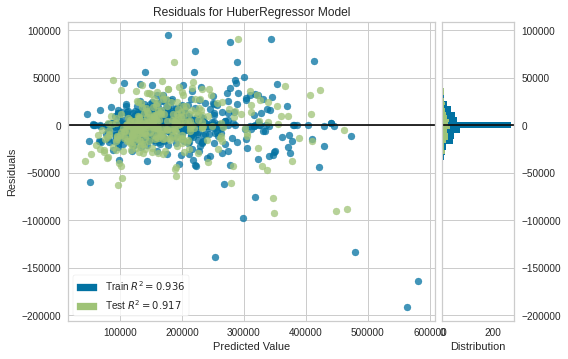

In [ ]:
# visualizando o resídual
plot_model(tuned_regr)

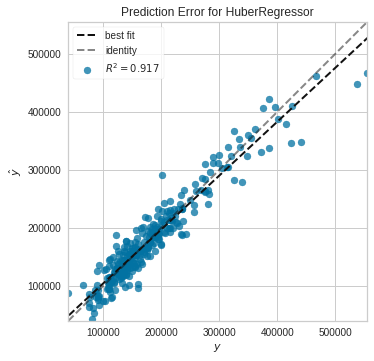

In [ ]:
# visualizando a prredição do erro da reta de regressão
plot_model(tuned_regr, plot='error')

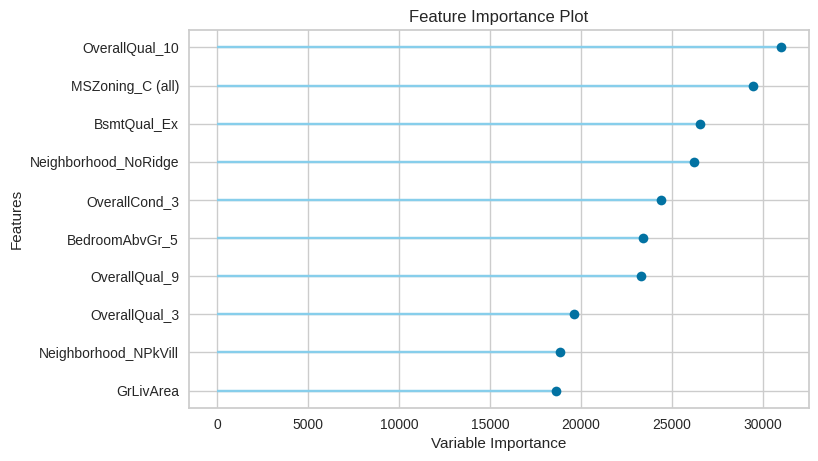

In [ ]:
# visualizando os recursos mais importante
plot_model(tuned_regr, plot='feature')

In [ ]:
# com a função "predict_model" visualizando os parâmetros de avaliação do modelo "tunado"
predict_model(tuned_regr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,16633.4525,5.301624e+08,23025.2565,0.9169,0.1465,0.1027


,HeatingQC_Gd,BsmtExposure_Gd,ExterCond_Fa,MoSold_4,Neighborhood_Somerst,SaleType_ConLD,Neighborhood_NAmes,RoofStyle_Hip,EnclosedPorch,OverallQual_3,KitchenQual_TA,GarageType_CarPort,Exterior1st_BrkFace,Foundation_BrkTil,MSSubClass_40,SaleCondition_Alloca,OverallQual_5,SaleType_ConLw,BedroomAbvGr_6,MoSold_8,BsmtFinSF1,MSSubClass_120,HalfBath_1,Neighborhood_BrDale,Electrical_SBrkr,GarageQual_Gd,Exterior1st_HdBoard,BldgType_2fmCon,MasVnrType_Stone,FireplaceQu_TA,MSSubClass_75,MSSubClass_30,MSSubClass_70,LotShape_Reg,MoSold_10,MasVnrType_not_available,1stFlrSF,MSSubClass_180,Neighborhood_BrkSide,Neighborhood_CollgCr,...,Neighborhood_StoneBr,Neighborhood_Gilbert,YrSold_2010,OverallQual_8,Exterior1st_MetalSd,Neighborhood_Crawfor,TotRmsAbvGrd_4,MasVnrType_None,Neighborhood_Sawyer,TotRmsAbvGrd_11,GarageCars_2,Exterior2nd_Plywood,KitchenQual_Ex,YrSold_2006,LotConfig_FR2,MSZoning_C (all),RoofStyle_Flat,GarageCars_4,LotArea,SaleCondition_Abnorml,OverallQual_6,TotRmsAbvGrd_8,OverallCond_2,BsmtHalfBath_1,HouseStyle_SFoyer,ExterCond_TA,Foundation_Stone,LotShape_IR3,TotRmsAbvGrd_12,MasVnrType_BrkCmn,GarageCond_Po,Exterior1st_WdShing,YearRemodAdd,FullBath_1,BedroomAbvGr_3,OverallQual_4,SaleType_New,BsmtFinSF2,SalePrice,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.365074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.790313,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.572622,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.204025,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425784,0.0,1.0,0.0,0.0,-0.28231,201000,204867.232483
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.365074,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.616299,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.317657,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.195064,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.229722,1.0,1.0,0.0,0.0,-0.28231,153000,165427.942427
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.365074,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301760,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.404924,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151760,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.750589,1.0,0.0,0.0,0.0,-0.28231,149000,160603.142431
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.365074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.037743,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.750185,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.348695,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.289760,1.0,0.0,0.0,0.0,-0.28231,120000,93723.546734
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.365074,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.894781,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.718125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.481843,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.730900,0.0,1.0,0.0,0.0,-0.28231,145000,138368.150323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.365074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.894781,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.085580,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134093,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.013970,0.0,1.0,0.0,1.0,-0.28231,155835,195878.835360
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.448037,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.894781,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.470299,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
# finalizando o modelo
model_HuberRegr = finalize_model(tuned_regr)

In [ ]:
# visualizando os parâmetros final do modelo
model_HuberRegr

HuberRegressor(alpha=1e-06, epsilon=1.1, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [ ]:
# com a função "predict_model" visualizando os parâmetros de avaliação do modelo final
predict_model(model_HuberRegr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,11449.9446,3.247885e+08,18021.8885,0.9491,0.1032,0.0676


,HeatingQC_Gd,BsmtExposure_Gd,ExterCond_Fa,MoSold_4,Neighborhood_Somerst,SaleType_ConLD,Neighborhood_NAmes,RoofStyle_Hip,EnclosedPorch,OverallQual_3,KitchenQual_TA,GarageType_CarPort,Exterior1st_BrkFace,Foundation_BrkTil,MSSubClass_40,SaleCondition_Alloca,OverallQual_5,SaleType_ConLw,BedroomAbvGr_6,MoSold_8,BsmtFinSF1,MSSubClass_120,HalfBath_1,Neighborhood_BrDale,Electrical_SBrkr,GarageQual_Gd,Exterior1st_HdBoard,BldgType_2fmCon,MasVnrType_Stone,FireplaceQu_TA,MSSubClass_75,MSSubClass_30,MSSubClass_70,LotShape_Reg,MoSold_10,MasVnrType_not_available,1stFlrSF,MSSubClass_180,Neighborhood_BrkSide,Neighborhood_CollgCr,...,Neighborhood_StoneBr,Neighborhood_Gilbert,YrSold_2010,OverallQual_8,Exterior1st_MetalSd,Neighborhood_Crawfor,TotRmsAbvGrd_4,MasVnrType_None,Neighborhood_Sawyer,TotRmsAbvGrd_11,GarageCars_2,Exterior2nd_Plywood,KitchenQual_Ex,YrSold_2006,LotConfig_FR2,MSZoning_C (all),RoofStyle_Flat,GarageCars_4,LotArea,SaleCondition_Abnorml,OverallQual_6,TotRmsAbvGrd_8,OverallCond_2,BsmtHalfBath_1,HouseStyle_SFoyer,ExterCond_TA,Foundation_Stone,LotShape_IR3,TotRmsAbvGrd_12,MasVnrType_BrkCmn,GarageCond_Po,Exterior1st_WdShing,YearRemodAdd,FullBath_1,BedroomAbvGr_3,OverallQual_4,SaleType_New,BsmtFinSF2,SalePrice,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.365074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.790313,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.572622,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.204025,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425784,0.0,1.0,0.0,0.0,-0.28231,201000,199154.270705
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.365074,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.616299,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.317657,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.195064,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.229722,1.0,1.0,0.0,0.0,-0.28231,153000,160020.633023
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.365074,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301760,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.404924,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151760,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.750589,1.0,0.0,0.0,0.0,-0.28231,149000,161197.674653
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.365074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.037743,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.750185,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.348695,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.289760,1.0,0.0,0.0,0.0,-0.28231,120000,111539.168453
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.365074,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.894781,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.718125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.481843,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.730900,0.0,1.0,0.0,0.0,-0.28231,145000,144190.790985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.365074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.894781,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.085580,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134093,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.013970,0.0,1.0,0.0,1.0,-0.28231,155835,190474.598620
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.448037,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.894781,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.470299,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,

In [ ]:
# aplicando o modelo final nos dados "y_train"
unseen_predictions = predict_model(model_HuberRegr, data=y_train)

# visualizando o valor rel VS predito
unseen_predictions[['SalePrice', 'Label']].head()

,SalePrice,Label
376,148000,138856.751906
250,76500,108698.542070
228,125000,116388.980009
40,160000,150893.337367
428,195400,200784.686293


In [ ]:
# importando a função para avaliação do modelo final
from pycaret.utils import check_metric

# checando performance do modelo, usando como métrica o "R2"
check_metric(unseen_predictions.SalePrice, unseen_predictions.Label, 'R2')

0.86

In [ ]:
# salvando o modelo
save_model(model_HuberRegr,'Final Huber Regressor Model 05Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='SalePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                                     top_features_to_pick=0.30000000000000004)),
                 ('fix_multi',
                  Fix_multicollinearity(correlation_with_target_preference=None,
                                        correlation_with_target_threshold=0.0,
                         

In [ ]:
# instanciando o modelo salvo
saved_final_HuberRegr = load_model('Final Huber Regressor Model 05Nov2021')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
# aplicando o modelo salvo nos dados "y_test"
new_prediction = predict_model(saved_final_HuberRegr, data=y_test)

In [ ]:
# visualizando o valor real VS predito
round(pd.DataFrame(new_prediction[['SalePrice', 'Label']].head()))

,SalePrice,Label
147,222500,218950.0
676,87000,134740.0
1304,130000,146214.0
1372,274300,251174.0
1427,140000,141098.0


In [ ]:
# importando a função para avaliação
from pycaret.utils import check_metric

# checando performance do modelo, usando como métrica o "R2"
check_metric(new_prediction.SalePrice, new_prediction.Label, 'R2')

0.898

## **5. Classificação - `employee`**

#### **5.1. Importando e preparando os dados**

In [ ]:
# importando a função "get_data" do módulo ".datasets" da biblioteca "pycaret"
from pycaret.datasets import get_data

In [ ]:
# instanciando o dataset "employee" na variável de mesmo nome
employee = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [ ]:
# dimensão do dataset
employee.shape    # linhas e colunas

(14999, 10)

In [ ]:
# importando da biblioteca do sklearn do módulo "model_selection" a função "train_test_split"
# essa função tem a finalidade de dividir a base de dados em treino e teste
from sklearn.model_selection import train_test_split

In [ ]:
# instanciando o conjunto de dados nas variáveis "X" e "y"
X = employee
y = employee

In [ ]:
# resetando os índices
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [ ]:
# aplicando a divisão dos dados em treino e teste - reservando 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=.3)

In [ ]:
# visualizando o tamanho do particionamento dos dados
len(X_train), len(X_test), len(y_train), len(y_test)

(10499, 4500, 10499, 4500)

#### **5.2. Aplicando a classificação**

In [ ]:
# importando a função para classificação
from pycaret.classification import*

In [ ]:
# inicializando o pipeline de classificação
classificador = setup(X_train, 
                      remove_outliers=True, 
                      normalize=True, 
                      fold=5, 
                      target='left', 
                    #   pca=True,
                      feature_selection=True,
                      feature_selection_threshold=0.7,
                      ignore_low_variance=True,
                      remove_multicollinearity=True, 
                      multicollinearity_threshold=0.7,
                      remove_perfect_collinearity=True,
                      silent=True)

,Description,Value
0,session_id,3320
1,Target,left
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10499, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# visualizando o melhor classificador pela métrica da acurácia
best_model = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9827,0.9858,0.9354,0.9911,0.9624,0.9512,0.9519,0.834
lightgbm,Light Gradient Boosting Machine,0.9812,0.9891,0.9408,0.9793,0.9596,0.9474,0.9478,0.150
et,Extra Trees Classifier,0.9767,0.9839,0.9342,0.9663,0.9499,0.9347,0.9350,0.792
gbc,Gradient Boosting Classifier,0.9744,0.9872,0.9251,0.9654,0.9448,0.9281,0.9285,0.596
dt,Decision Tree Classifier,0.9681,0.9583,0.9396,0.9267,0.9331,0.9121,0.9122,0.042
ada,Ada Boost Classifier,0.9610,0.9801,0.9125,0.9225,0.9174,0.8919,0.8920,0.282
knn,K Neighbors Classifier,0.9575,0.9681,0.9203,0.9027,0.9113,0.8833,0.8835,0.366
svm,SVM - Linear Kernel,0.8970,0.0000,0.8050,0.7716,0.7878,0.7198,0.7202,0.050
lr,Logistic Regression,0.8933,0.9325,0.7989,0.7626,0.7801,0.7098,0.7102,0.094
lda,Linear Discriminant Analysis,0.8788,0.9246,0.8345,0.7078,0.7656,0.6847,0.6892,0.048


In [ ]:
# instanciando o classificador com melhor performance
randFor_class = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9821,0.9868,0.9277,0.9968,0.9610,0.9494,0.9504
1,0.9828,0.9857,0.9426,0.9842,0.9630,0.9518,0.9522
2,0.9807,0.9854,0.9275,0.9903,0.9579,0.9453,0.9462
3,0.9842,0.9864,0.9456,0.9874,0.9660,0.9558,0.9562
4,0.9835,0.9846,0.9335,0.9968,0.9641,0.9534,0.9543
Mean,0.9827,0.9858,0.9354,0.9911,0.9624,0.9512,0.9519
SD,0.0012,0.0007,0.0075,0.0050,0.0028,0.0036,0.0034


In [ ]:
# "tunando" o classificador
tuned_class = tune_model(randFor_class, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9742,0.9855,0.9157,0.9744,0.9441,0.9274,0.9281
1,0.9792,0.9880,0.9275,0.9840,0.9549,0.9414,0.9421
2,0.9728,0.9869,0.9094,0.9741,0.9406,0.9230,0.9239
3,0.9799,0.9866,0.9396,0.9749,0.9569,0.9439,0.9441
4,0.9742,0.9831,0.9094,0.9805,0.9436,0.9269,0.9280
Mean,0.9761,0.9860,0.9203,0.9776,0.9480,0.9325,0.9333
SD,0.0029,0.0016,0.0117,0.0040,0.0066,0.0084,0.0082


In [ ]:
# realizando as predições com o classificador "tunado"
predictions = predict_model(tuned_class, data=X_test)

In [ ]:
# visualizando os valores reais VS as predições realizadas pelo modelo "tunado"
predictions[['left', 'Label']]

,left,Label
6958,0,0
7534,0,0
2975,0,0
3903,0,0
8437,0,0
...,...,...
8001,0,0
11630,0,0
8163,0,0
4063,0,0


In [ ]:
# salvando o modelo para ser submetido ao "Kaggle"
output = pd.DataFrame({
    'Id': X_test.index,
    'left': predictions['Label']
})

output.set_index('Id', inplace=True)
output.to_csv('submission.csv')

In [ ]:
# visualizando o dataframe
output

,left
Id,
6958,0
7534,0
2975,0
3903,0
8437,0
...,...
8001,0
11630,0
8163,0


In [73]:
# visualizando graficamente a performance do modelo
evaluate_model(randFor_class);

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

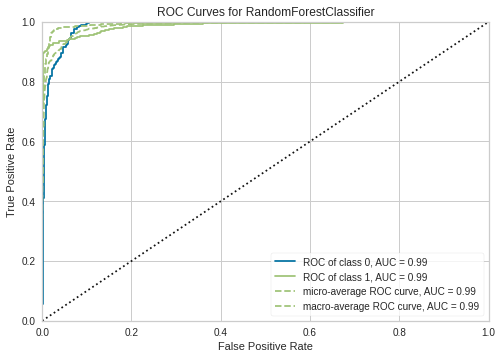

In [74]:
# visualizando o gráfico da curva ROC
plot_model(tuned_class)

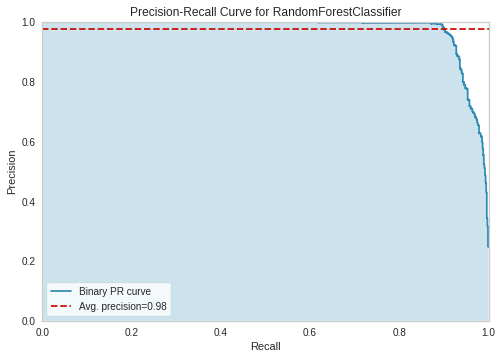

In [75]:
# visualizando o gráfico da curva de  precisão-recall
plot_model(tuned_class, plot='pr')

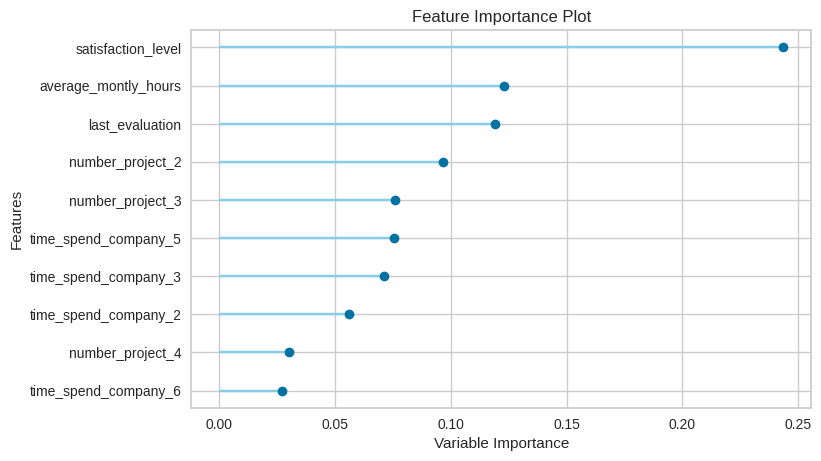

In [76]:
# visualizando os recursos de maior importância para o modelo
plot_model(tuned_class, plot='feature')

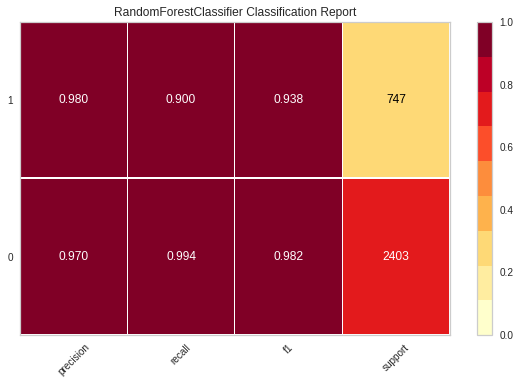

In [77]:
# visualizando o relatório de classificação
plot_model(tuned_class, plot='class_report')

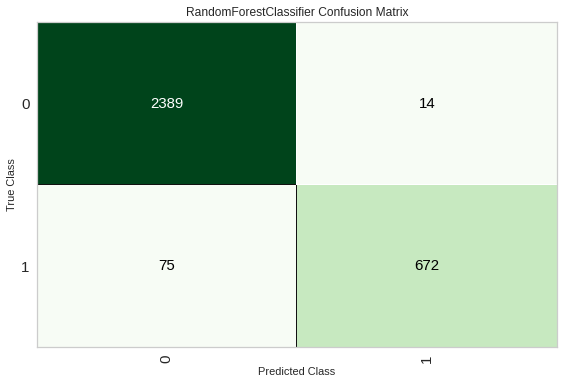

In [78]:
# visualizando a matriz de confusão
plot_model(tuned_class, plot='confusion_matrix')

In [79]:
# visualizando as métricas do modelo "tunado"
predict_model(tuned_class);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9717,0.9871,0.8996,0.9796,0.9379,0.9196,0.921


In [80]:
# finalizando e instanciando o modelo "tunado"
model_RandFor = finalize_model(tuned_class)

In [81]:
# visualizando os parâmetros do modelo "tunado"
model_RandFor

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=3320, verbose=0,
                       warm_start=False)

In [82]:
# visualizando as métricas de desempenho do modelo
predict_model(model_RandFor);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9759,0.9953,0.917,0.98,0.9474,0.9318,0.9327


In [83]:
# aplicando o modelo nos dados de "y_ytrain"
unseen_predictions = predict_model(model_RandFor, data=y_train)

# visualizando os valores reais VS valores preditos
unseen_predictions[['left', 'Label']].head()

,left,Label
5242,0,0
12674,1,1
6924,0,0
12595,1,1
13482,0,0


In [84]:
# importando a função para avaliação
from pycaret.utils import check_metric

# checando a performance do modelo, usando como métrica de referência acurácia
check_metric(unseen_predictions.left, unseen_predictions.Label, 'Accuracy')

0.9792

In [85]:
# salvando o modelo
save_model(model_RandFor,'Final Random Forest Model 05Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='left',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced',
                                         criterion='entropy', max_depth=9,
                                         max_features='sqrt',

In [86]:
# instanciando o modelo salvo na variável "saved_final_RandFor"
saved_final_RandFor = load_model('Final Random Forest Model 05Nov2021')

Transformation Pipeline and Model Successfully Loaded


In [87]:
# realizando novas predições com modelo final salvo 
new_prediction = predict_model(saved_final_RandFor, data=y_test)

In [88]:
# visualizando os valores reais VS valores preditos
pd.DataFrame(new_prediction[['left', 'Label']].head())

,left,Label
6958,0,0
7534,0,0
2975,0,0
3903,0,0
8437,0,0


In [89]:
# importando a função para avaliação
from pycaret.utils import check_metric

# visualizando a performance do modelo, usando como métrica acurácia
check_metric(new_prediction.left, new_prediction.Label, 'Accuracy')

0.9718

## **6. Clusterização - `seeds`**

#### **6.1. Importando e preparando os dados**

In [139]:
# importando a função "get_data" do módulo ".datasets" da biblioteca "pycaret"
from pycaret.datasets import get_data

Diferentemente do tutorial do `PyCaret`, utilizarei um outro conjunto de dados.

In [140]:
# instanciando o dataset "seeds" na variável de mesmo nome
seeds = get_data('seeds')

,area,perimeter,compactness,length,width,asymmetry,length.1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [141]:
# particionando os dados em treino e validação
train_data = seeds.sample(frac=0.7, random_state=786)
val_data = seeds.drop(train_data.index)

train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)

print('Dados de treino: ' + str(train_data.shape))
print('Dados de validação: ' + str(val_data.shape))

Dados de treino: (147, 7)
Dados de validação: (63, 7)


#### **6.2. Aplicando a clusterização**

In [142]:
# importando a função para clusterização
from pycaret.clustering import*

In [143]:
# inicializando o pipeline de clusterização
cluster = setup(train_data, 
                normalize=True, 
                # pca=True,
                ignore_low_variance=True,
                remove_multicollinearity=True, 
                multicollinearity_threshold=0.7,
                remove_perfect_collinearity=True,
                silent=True)

,Description,Value
0,session_id,2097
1,Original Data,"(147, 7)"
2,Missing Values,True
3,Numeric Features,7
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(147, 4)"
9,CPU Jobs,-1


In [144]:
# visualizando os modelos de clusterização presentes no "PyCaret"
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [132]:
# instanciando o modelo "kmeans"
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.318,90.877,0.974,0,0,0


In [133]:
# visualizando os parâmetros do modelo instanciado
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=2846, tol=0.0001, verbose=0)

In [146]:
# instanciando o modelo e passando o número de clusters
kmodes = create_model('kmodes', 
                      num_clusters=3) # 3 clusters

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1456,0.9466,9.8132,0,0,0


In [147]:
# visualizando os parâmetros do modelo definido o número de cluster manualmente
kmodes

KModes(cat_dissim=<function matching_dissim at 0x7f77734ab710>, init='Cao',
       max_iter=100, n_clusters=3, n_init=1, n_jobs=-1, random_state=2097,
       verbose=0)

In [148]:
# instanciando o modelo "kmeans"
kmean_results = assign_model(kmeans)
kmean_results.head(10)

,area,perimeter,compactness,length,width,asymmetry,length.1,Cluster
0,14.11,14.18,0.8820,5.541,3.221,2.754,5.038,Cluster 2
1,11.48,13.05,0.8473,5.180,2.758,5.876,5.002,Cluster 1
2,11.82,13.40,0.8274,5.314,2.777,4.471,5.178,Cluster 1
3,12.89,13.77,0.8541,5.495,3.026,6.185,5.316,Cluster 1
4,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,Cluster 2
5,16.23,15.18,0.8850,5.872,3.472,3.769,5.922,Cluster 0
6,18.36,16.52,0.8452,6.666,3.485,4.933,6.448,Cluster 1
7,14.37,14.39,0.8726,5.569,3.153,1.464,5.300,Cluster 2
8,18.75,16.18,0.8999,6.111,3.869,4.188,5.992,Cluster 0
9,15.38,14.77,0.8857,5.662,3.419,1.999,5.222,Cluster 2


In [149]:
# com a função "evaluate_model()" podemos viualizar gráficos de clusterização
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [108]:
# com a função "evaluate_model()" podemos viualizar gráficos de clusterização
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

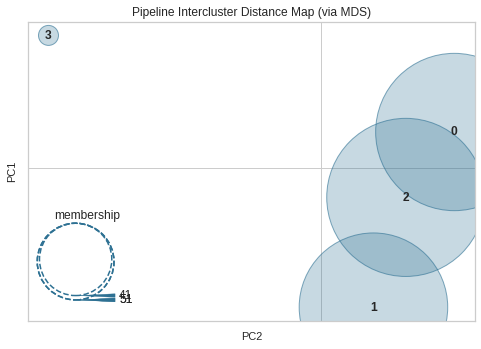

In [150]:
# passando o argumento "plot=distance", podemos visualizar a distância entre os clusters
plot_model(kmeans, plot='distance')

In [151]:
# visualizando a distribuição dos clusters em 3D
plot_model(kmeans, plot='tsne')

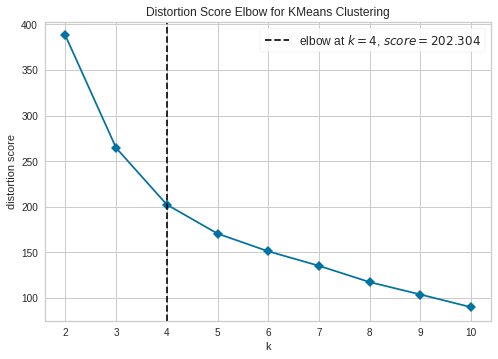

In [152]:
# visualizando a "curva do cotovelo" do modelo
plot_model(kmeans, plot='elbow')

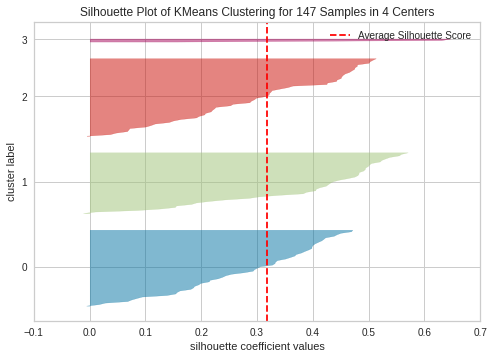

In [153]:
# visualizando a silhueta da consistência da distribuição dos clusters
plot_model(kmeans, plot='silhouette')

In [154]:
# visualizando a quantidade das observações nos clusters
plot_model(kmeans, plot='distribution')

In [155]:
# visualizando a distribuição dos clusters pelo recurso "compactness"
plot_model(kmeans, plot='distribution', feature='compactness')

In [156]:
# visualizando a distribuição dos clusters pelo recurso "asymmetry"
plot_model(kmeans, plot='distribution', feature='asymmetry')

In [157]:
# realizando novas predições com os dados de valição
unseen_predictions = predict_model(kmeans, data=val_data)

# visualizando as 5 primeiras predições
unseen_predictions.head()

,area,perimeter,compactness,length,width,asymmetry,length.1,Cluster
0,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Cluster 2
1,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Cluster 2
2,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Cluster 2
3,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Cluster 2
4,15.69,14.75,0.9058,5.527,3.514,1.599,5.046,Cluster 2


In [158]:
# salvando o modelo
save_model(kmeans,'Final KMeans Model 06Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=Non...
                  Fix_multicollinearity(correlation_with_target_preference=None,
                                        correlation_with_target_threshold=0.0,
                                        target_variable='UNSUPERVISED_DUMMY_TARGET',
                                        threshold=0.7)),
     

In [159]:
# instanciando o modelo
saved_kmeans = load_model('Final KMeans Model 06Nov2021')

Transformation Pipeline and Model Successfully Loaded


In [160]:
# realizando novas predições
new_prediction = predict_model(saved_kmeans, data=val_data)

In [161]:
# visualizando as 5 primeiras predições
new_prediction.head()

,area,perimeter,compactness,length,width,asymmetry,length.1,Cluster
0,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Cluster 2
1,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Cluster 2
2,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Cluster 2
3,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Cluster 2
4,15.69,14.75,0.9058,5.527,3.514,1.599,5.046,Cluster 2


Chegamos ao final da utilidade do `PyCaret`. Existe outras possibilidades de aplicação, mas como forma de introdução foi possível construir uma base de conhecimento.

## **7. Material de apoio**

- https://pycaret.readthedocs.io/en/latest/tutorials.html#